# Project Sustain-ed

In this Notebook i create a small chatbot that gives you information and ways to contribute towards the SDG's

# Importing libraries required

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
 
from numpy import argmax
import numpy as np
import re
import pandas as pd

# Training Data

In [72]:
x=['hello',
   'hi',
   'your name',
   'sustain-ed',
   'sdg',
   "sdg's",
   'sdg 1',
   'sdg 2',
   'sdg 3',
   'sdg 4',
   'sdg 5',
   'sdg 6',
   'sdg 7',
   'sdg 8',
   'sdg 9',
   'sdg 10',
   'sdg 11',
   'sdg 12',
   'sdg 13',
   'sdg 14',
   'sdg 15',
   'sdg 16',
   'sdg 17']




In [75]:
y=['greeting','greeting','robo_name','robo_name','sdg','sdg','sdg 1','sdg 2','sdg 3','sdg 4','sdg 5',
   'sdg 6','sdg 7','sdg 8','sdg 9','sdg 10','sdg 11','sdg 12','sdg 13','sdg 14','sdg 15','sdg 16',
   'sdg 17']


In [76]:
print('length of x =',len(x), 'length of y =',len(y))

length of x = 23 length of y = 23


# Defining the needed functions

In [77]:
#1)removing the alpha numeric characters in a sentence
def remove_non_alpha_char(sentence):
    new_sentence = ''
    for alphabet in sentence:
        if alphabet.isalnum() or alphabet == ' ':
            new_sentence += alphabet
    return new_sentence
#2)preprocessing the data
def preprocess(X):
    X = [data_point.lower() for data_point in X]
    X = [remove_non_alpha_char(sentence) for sentence in X]
    X = [data_point.strip() for data_point in X]
    X = [re.sub(' +', ' ',
                data_point) for data_point in X]
    return X


# Creating Vocabulary


In [78]:
x = preprocess(x)

vocab = set()
for data_point in x:
    for word in data_point.split(' '):
        vocab.add(word)

vocabulary = list(vocab)
vocabulary

['7',
 'your',
 '1',
 '16',
 '8',
 'sustained',
 '9',
 '2',
 '3',
 '11',
 'name',
 '10',
 '15',
 '12',
 '13',
 'sdgs',
 'hello',
 '14',
 '5',
 '4',
 '6',
 'sdg',
 '17',
 'hi']

In [79]:
x_encoded = []

def encode_sentence(sentence):
    sentence = preprocess([sentence])[0]
    sentence_encoded = [0] * len(vocabulary)
    for i in range(len(vocabulary)):
        if vocabulary[i] in sentence.split(' '):
            sentence_encoded[i] = 1
    return sentence_encoded

x_encoded = [encode_sentence(sentence) for sentence in x]
x_encoded

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0,

In [80]:
classes = list(set(y))

y_encoded = []
for data_point in y:
    data_point_encoded = [0] * len(classes)
    for i in range(len(classes)):
        if classes[i] == data_point:
            data_point_encoded[i] = 1
    y_encoded.append(data_point_encoded)

In [81]:
x_train = x_encoded
y_train =y_encoded
x_test = x_encoded
y_test = y_encoded

In [82]:
print (y_test)

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 

In [83]:
print(x_test)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [84]:
y_train


[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
model = Sequential()
model.add(Dense(units=64, activation='sigmoid',
                input_dim=len(x_train[0])))
model.add(Dense(units=len(y_train[0]), activation='softmax'))
model.compile(loss=categorical_crossentropy,
              optimizer=SGD(lr=0.001,
                            momentum=0.9, nesterov=True))
model.fit(np.array(x_train), np.array(y_train), epochs=5000, batch_size=16)

Epoch 1/5000
2/2 [==============================] - 1s 4ms/step - loss: 3.2830
Epoch 2/5000
2/2 [==============================] - 0s 8ms/step - loss: 3.2756
Epoch 3/5000
2/2 [==============================] - 0s 20ms/step - loss: 3.2646
Epoch 4/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.2513
Epoch 5/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.2376
Epoch 6/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.2208
Epoch 7/5000
2/2 [==============================] - 0s 6ms/step - loss: 3.2057
Epoch 8/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1903
Epoch 9/5000
2/2 [==============================] - 0s 8ms/step - loss: 3.1758
Epoch 10/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.1625
Epoch 11/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.1480
Epoch 12/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1369
Epoch 13/5000
2/2 [=============================

Epoch 103/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.9378
Epoch 104/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.9370
Epoch 105/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.9365
Epoch 106/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.9360
Epoch 107/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.9355
Epoch 108/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9351
Epoch 109/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.9344
Epoch 110/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.9339
Epoch 111/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.9336
Epoch 112/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.9332
Epoch 113/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.9328
Epoch 114/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.9321
Epoch 115/5000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 2.9081
Epoch 204/5000
2/2 [==============================] - 0s 12ms/step - loss: 2.9079
Epoch 205/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.9076
Epoch 206/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.9075
Epoch 207/5000
2/2 [==============================] - 0s 11ms/step - loss: 2.9072
Epoch 208/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.9074
Epoch 209/5000
2/2 [==============================] - 0s 12ms/step - loss: 2.9071
Epoch 210/5000
2/2 [==============================] - ETA: 0s - loss: 2.914 - 0s 9ms/step - loss: 2.9066
Epoch 211/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.9065
Epoch 212/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.9066
Epoch 213/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.9061
Epoch 214/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.9059
Epoch 215/5000
2

2/2 [==============================] - 0s 9ms/step - loss: 2.8888
Epoch 303/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8887
Epoch 304/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8883
Epoch 305/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.8880
Epoch 306/5000
2/2 [==============================] - ETA: 0s - loss: 2.894 - 0s 13ms/step - loss: 2.8878
Epoch 307/5000
2/2 [==============================] - 0s 13ms/step - loss: 2.8877
Epoch 308/5000
2/2 [==============================] - 0s 12ms/step - loss: 2.8871
Epoch 309/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8871
Epoch 310/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8872
Epoch 311/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.8868
Epoch 312/5000
2/2 [==============================] - 0s 73ms/step - loss: 2.8866
Epoch 313/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.8863
Epoch 314/5000


2/2 [==============================] - 0s 10ms/step - loss: 2.8704
Epoch 403/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8702
Epoch 404/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8700
Epoch 405/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.8698
Epoch 406/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.8695
Epoch 407/5000
2/2 [==============================] - 0s 14ms/step - loss: 2.8694
Epoch 408/5000
2/2 [==============================] - 0s 16ms/step - loss: 2.8691
Epoch 409/5000
2/2 [==============================] - ETA: 0s - loss: 2.922 - 0s 12ms/step - loss: 2.8690
Epoch 410/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.8689
Epoch 411/5000
2/2 [==============================] - 0s 14ms/step - loss: 2.8689
Epoch 412/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.8682
Epoch 413/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.8680
Epoch 414/5000

2/2 [==============================] - 0s 6ms/step - loss: 2.8514
Epoch 503/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8515
Epoch 504/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8509
Epoch 505/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.8509
Epoch 506/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8506
Epoch 507/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8505
Epoch 508/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.8500
Epoch 509/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8500
Epoch 510/5000
2/2 [==============================] - 0s 10ms/step - loss: 2.8496
Epoch 511/5000
2/2 [==============================] - 0s 13ms/step - loss: 2.8496
Epoch 512/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8492
Epoch 513/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8490
Epoch 514/5000
2/2 [=====================

2/2 [==============================] - 0s 4ms/step - loss: 2.8316
Epoch 603/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8315
Epoch 604/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8313
Epoch 605/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8313
Epoch 606/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8314
Epoch 607/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.8309
Epoch 608/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8308
Epoch 609/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8305
Epoch 610/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.8303
Epoch 611/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8304
Epoch 612/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8298
Epoch 613/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.8302
Epoch 614/5000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 2.8116
Epoch 704/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8114
Epoch 705/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.8110
Epoch 706/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8110
Epoch 707/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8108
Epoch 708/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.8106
Epoch 709/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8105
Epoch 710/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8102
Epoch 711/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8100
Epoch 712/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8097
Epoch 713/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.8094
Epoch 714/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.8096
Epoch 715/5000
2/2 [=======================

2/2 [==============================] - 0s 6ms/step - loss: 2.7910
Epoch 804/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7910
Epoch 805/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7907
Epoch 806/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7907
Epoch 807/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7905
Epoch 808/5000
2/2 [==============================] - ETA: 0s - loss: 2.760 - 0s 18ms/step - loss: 2.7904
Epoch 809/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7902
Epoch 810/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7898
Epoch 811/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.7897
Epoch 812/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7894
Epoch 813/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7893
Epoch 814/5000
2/2 [==============================] - 0s 12ms/step - loss: 2.7891
Epoch 815/5000
2/

2/2 [==============================] - 0s 8ms/step - loss: 2.7708
Epoch 903/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.7704
Epoch 904/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.7704
Epoch 905/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.7700
Epoch 906/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7698
Epoch 907/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.7698
Epoch 908/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7693
Epoch 909/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7693
Epoch 910/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7689
Epoch 911/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.7690
Epoch 912/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7685
Epoch 913/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7682
Epoch 914/5000
2/2 [=======================

2/2 [==============================] - 0s 5ms/step - loss: 2.7492
Epoch 1003/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7488
Epoch 1004/5000
2/2 [==============================] - 0s 67ms/step - loss: 2.7488
Epoch 1005/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7489
Epoch 1006/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7485
Epoch 1007/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7483
Epoch 1008/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.7479
Epoch 1009/5000
2/2 [==============================] - ETA: 0s - loss: 2.731 - 0s 5ms/step - loss: 2.7479
Epoch 1010/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.7476
Epoch 1011/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7474
Epoch 1012/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.7470
Epoch 1013/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7469
Epoch 1

2/2 [==============================] - 0s 4ms/step - loss: 2.7279
Epoch 1102/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7275
Epoch 1103/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7269
Epoch 1104/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7271
Epoch 1105/5000
2/2 [==============================] - 0s 24ms/step - loss: 2.7267
Epoch 1106/5000
2/2 [==============================] - 0s 14ms/step - loss: 2.7265
Epoch 1107/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7262
Epoch 1108/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7259
Epoch 1109/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7257
Epoch 1110/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7256
Epoch 1111/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7252
Epoch 1112/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7249
Epoch 1113/5000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 2.7052
Epoch 1201/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7047
Epoch 1202/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7045
Epoch 1203/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7045
Epoch 1204/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7042
Epoch 1205/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7040
Epoch 1206/5000
2/2 [==============================] - 0s 13ms/step - loss: 2.7035
Epoch 1207/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.7034
Epoch 1208/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.7029
Epoch 1209/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7026
Epoch 1210/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7026
Epoch 1211/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7022
Epoch 1212/5000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 2.6814
Epoch 1300/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6811
Epoch 1301/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6808
Epoch 1302/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6804
Epoch 1303/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6804
Epoch 1304/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6802
Epoch 1305/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.6801
Epoch 1306/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6798
Epoch 1307/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6796
Epoch 1308/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6794
Epoch 1309/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6790
Epoch 1310/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6787
Epoch 1311/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 2.6568
Epoch 1400/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6565
Epoch 1401/5000
2/2 [==============================] - 0s 13ms/step - loss: 2.6562
Epoch 1402/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6560
Epoch 1403/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6557
Epoch 1404/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6554
Epoch 1405/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6551
Epoch 1406/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6549
Epoch 1407/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6548
Epoch 1408/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6545
Epoch 1409/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6542
Epoch 1410/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.6540
Epoch 1411/5000
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 2.6315
Epoch 1500/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6310
Epoch 1501/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6308
Epoch 1502/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6306
Epoch 1503/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6304
Epoch 1504/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6302
Epoch 1505/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6302
Epoch 1506/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6298
Epoch 1507/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6295
Epoch 1508/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6291
Epoch 1509/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6291
Epoch 1510/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6286
Epoch 1511/5000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 2.6055
Epoch 1600/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6052
Epoch 1601/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6048
Epoch 1602/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6046
Epoch 1603/5000
2/2 [==============================] - 0s 19ms/step - loss: 2.6043
Epoch 1604/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6039
Epoch 1605/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6037
Epoch 1606/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6034
Epoch 1607/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.6033
Epoch 1608/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6031
Epoch 1609/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.6030
Epoch 1610/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.6026
Epoch 1611/5000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 2.5788
Epoch 1699/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5786
Epoch 1700/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.5783
Epoch 1701/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.5781
Epoch 1702/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5778
Epoch 1703/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5776
Epoch 1704/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5773
Epoch 1705/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.5771
Epoch 1706/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5767
Epoch 1707/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.5763
Epoch 1708/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5764
Epoch 1709/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.5761
Epoch 1710/5000
2/2 [===========

Epoch 1798/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5506
Epoch 1799/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5504
Epoch 1800/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.5501
Epoch 1801/5000
2/2 [==============================] - 0s 10ms/step - loss: 2.5500
Epoch 1802/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5494
Epoch 1803/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5492
Epoch 1804/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5490
Epoch 1805/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5488
Epoch 1806/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.5484
Epoch 1807/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5482
Epoch 1808/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5478
Epoch 1809/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5476
Epoch 1810/5000

2/2 [==============================] - 0s 8ms/step - loss: 2.5225
Epoch 1898/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5224
Epoch 1899/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5219
Epoch 1900/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5216
Epoch 1901/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5213
Epoch 1902/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5210
Epoch 1903/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5207
Epoch 1904/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5204
Epoch 1905/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5200
Epoch 1906/5000
2/2 [==============================] - 0s 12ms/step - loss: 2.5197
Epoch 1907/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5194
Epoch 1908/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5193
Epoch 1909/5000
2/2 [==========

2/2 [==============================] - 0s 6ms/step - loss: 2.4926
Epoch 1998/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4921
Epoch 1999/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4919
Epoch 2000/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4914
Epoch 2001/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4911
Epoch 2002/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4910
Epoch 2003/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4908
Epoch 2004/5000
2/2 [==============================] - 0s 10ms/step - loss: 2.4902
Epoch 2005/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4901
Epoch 2006/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4898
Epoch 2007/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4898
Epoch 2008/5000
2/2 [==============================] - 0s 19ms/step - loss: 2.4892
Epoch 2009/5000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 2.4628
Epoch 2097/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4625
Epoch 2098/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4623
Epoch 2099/5000
2/2 [==============================] - 0s 11ms/step - loss: 2.4620
Epoch 2100/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4617
Epoch 2101/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4611
Epoch 2102/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4610
Epoch 2103/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4608
Epoch 2104/5000
2/2 [==============================] - 0s 18ms/step - loss: 2.4604
Epoch 2105/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.4598
Epoch 2106/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4597
Epoch 2107/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4592
Epoch 2108/5000
2/2 [=========

Epoch 2196/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.4325
Epoch 2197/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4323
Epoch 2198/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4319
Epoch 2199/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4316
Epoch 2200/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4313
Epoch 2201/5000
2/2 [==============================] - 0s 25ms/step - loss: 2.4309
Epoch 2202/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4306
Epoch 2203/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.4301
Epoch 2204/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4302
Epoch 2205/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4298
Epoch 2206/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4293
Epoch 2207/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4291
Epoch 2208/5000

2/2 [==============================] - 0s 4ms/step - loss: 2.4014
Epoch 2296/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4011
Epoch 2297/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4007
Epoch 2298/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4005
Epoch 2299/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4001
Epoch 2300/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3998
Epoch 2301/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3995
Epoch 2302/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3991
Epoch 2303/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3987
Epoch 2304/5000
2/2 [==============================] - 0s 24ms/step - loss: 2.3987
Epoch 2305/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3983
Epoch 2306/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3979
Epoch 2307/5000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 2.3696
Epoch 2395/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.3695
Epoch 2396/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3692
Epoch 2397/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3687
Epoch 2398/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3686
Epoch 2399/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3681
Epoch 2400/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3677
Epoch 2401/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3675
Epoch 2402/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.3670
Epoch 2403/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3666
Epoch 2404/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3665
Epoch 2405/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3661
Epoch 2406/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 2.3382
Epoch 2494/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3379
Epoch 2495/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3377
Epoch 2496/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3374
Epoch 2497/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3367
Epoch 2498/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3365
Epoch 2499/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.3362
Epoch 2500/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3358
Epoch 2501/5000
2/2 [==============================] - 0s 16ms/step - loss: 2.3356
Epoch 2502/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.3352
Epoch 2503/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.3346
Epoch 2504/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.3344
Epoch 2505/5000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 2.3055
Epoch 2593/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3054
Epoch 2594/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3048
Epoch 2595/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.3044
Epoch 2596/5000
2/2 [==============================] - 0s 20ms/step - loss: 2.3043
Epoch 2597/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.3038
Epoch 2598/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3034
Epoch 2599/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3034
Epoch 2600/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3027
Epoch 2601/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3025
Epoch 2602/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3021
Epoch 2603/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3018
Epoch 2604/5000
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 2.2728
Epoch 2692/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.2727
Epoch 2693/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2723
Epoch 2694/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.2718
Epoch 2695/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2716
Epoch 2696/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.2713
Epoch 2697/5000
2/2 [==============================] - 0s 12ms/step - loss: 2.2710
Epoch 2698/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.2709
Epoch 2699/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2704
Epoch 2700/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.2700
Epoch 2701/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2697
Epoch 2702/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2693
Epoch 2703/5000
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 2.2413
Epoch 2791/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2409
Epoch 2792/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2404
Epoch 2793/5000
2/2 [==============================] - 0s 11ms/step - loss: 2.2402
Epoch 2794/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2398
Epoch 2795/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2397
Epoch 2796/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.2391
Epoch 2797/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2391
Epoch 2798/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2385
Epoch 2799/5000
2/2 [==============================] - 0s 14ms/step - loss: 2.2382
Epoch 2800/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2380
Epoch 2801/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2374
Epoch 2802/5000
2/2 [=========

Epoch 2890/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2086
Epoch 2891/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.2085
Epoch 2892/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2081
Epoch 2893/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2077
Epoch 2894/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2074
Epoch 2895/5000
2/2 [==============================] - 0s 10ms/step - loss: 2.2069
Epoch 2896/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.2067
Epoch 2897/5000
2/2 [==============================] - ETA: 0s - loss: 2.052 - 0s 5ms/step - loss: 2.2065
Epoch 2898/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.2062
Epoch 2899/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2056
Epoch 2900/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2053
Epoch 2901/5000
2/2 [==============================] - 0s 5ms/step - loss

2/2 [==============================] - 0s 7ms/step - loss: 2.1762
Epoch 2990/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1757
Epoch 2991/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.1756
Epoch 2992/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1755
Epoch 2993/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.1749
Epoch 2994/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1746
Epoch 2995/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1741
Epoch 2996/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.1738
Epoch 2997/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1734
Epoch 2998/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.1733
Epoch 2999/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.1726
Epoch 3000/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1723
Epoch 3001/5000
2/2 [===========

2/2 [==============================] - 0s 5ms/step - loss: 2.1433
Epoch 3089/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1430
Epoch 3090/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.1427
Epoch 3091/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.1424
Epoch 3092/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1420
Epoch 3093/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1417
Epoch 3094/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1413
Epoch 3095/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1409
Epoch 3096/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1407
Epoch 3097/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1406
Epoch 3098/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.1400
Epoch 3099/5000
2/2 [==============================] - 0s 9ms/step - loss: 2.1398
Epoch 3100/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 2.1107
Epoch 3189/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.1104
Epoch 3190/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1102
Epoch 3191/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1099
Epoch 3192/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1094
Epoch 3193/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1091
Epoch 3194/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1088
Epoch 3195/5000
2/2 [==============================] - 0s 17ms/step - loss: 2.1085
Epoch 3196/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.1081
Epoch 3197/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1078
Epoch 3198/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1074
Epoch 3199/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.1073
Epoch 3200/5000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 2.0785
Epoch 3288/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.0782
Epoch 3289/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0779
Epoch 3290/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.0774
Epoch 3291/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.0774
Epoch 3292/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0768
Epoch 3293/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0764
Epoch 3294/5000
2/2 [==============================] - 0s 11ms/step - loss: 2.0761
Epoch 3295/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.0759
Epoch 3296/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.0754
Epoch 3297/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.0751
Epoch 3298/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0748
Epoch 3299/5000
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 2.0466
Epoch 3386/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.0461
Epoch 3387/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.0460
Epoch 3388/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.0457
Epoch 3389/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.0451
Epoch 3390/5000
2/2 [==============================] - 0s 8ms/step - loss: 2.0449
Epoch 3391/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.0445
Epoch 3392/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0443
Epoch 3393/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0438
Epoch 3394/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.0436
Epoch 3395/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.0433
Epoch 3396/5000
2/2 [==============================] - 0s 13ms/step - loss: 2.0429
Epoch 3397/5000
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 2.0148
Epoch 3485/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.0143
Epoch 3486/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0141
Epoch 3487/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.0137
Epoch 3488/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.0134
Epoch 3489/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0130
Epoch 3490/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.0127
Epoch 3491/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0123
Epoch 3492/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.0118
Epoch 3493/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0117
Epoch 3494/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.0111
Epoch 3495/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.0108
Epoch 3496/5000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 1.9826
Epoch 3584/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.9821
Epoch 3585/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.9818
Epoch 3586/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9815
Epoch 3587/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9811
Epoch 3588/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.9809
Epoch 3589/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.9806
Epoch 3590/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9803
Epoch 3591/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9798
Epoch 3592/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9795
Epoch 3593/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9794
Epoch 3594/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9791
Epoch 3595/5000
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 1.9508
Epoch 3683/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9504
Epoch 3684/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9501
Epoch 3685/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9498
Epoch 3686/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9494
Epoch 3687/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9490
Epoch 3688/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.9489
Epoch 3689/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9487
Epoch 3690/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9483
Epoch 3691/5000
2/2 [==============================] - 0s 9ms/step - loss: 1.9479
Epoch 3692/5000
2/2 [==============================] - 0s 9ms/step - loss: 1.9475
Epoch 3693/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9473
Epoch 3694/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 1.9187
Epoch 3782/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9184
Epoch 3783/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9180
Epoch 3784/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.9176
Epoch 3785/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9173
Epoch 3786/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9169
Epoch 3787/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.9167
Epoch 3788/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.9163
Epoch 3789/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.9160
Epoch 3790/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.9156
Epoch 3791/5000
2/2 [==============================] - ETA: 0s - loss: 1.780 - 0s 3ms/step - loss: 1.9153
Epoch 3792/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.9151
Epoch 37

2/2 [==============================] - 0s 4ms/step - loss: 1.8865
Epoch 3881/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8860
Epoch 3882/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.8859
Epoch 3883/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8856
Epoch 3884/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8851
Epoch 3885/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8847
Epoch 3886/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8845
Epoch 3887/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8840
Epoch 3888/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.8837
Epoch 3889/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8834
Epoch 3890/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8830
Epoch 3891/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8828
Epoch 3892/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 1.8546
Epoch 3981/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8542
Epoch 3982/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.8538
Epoch 3983/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8536
Epoch 3984/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8532
Epoch 3985/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8529
Epoch 3986/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8526
Epoch 3987/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8523
Epoch 3988/5000
2/2 [==============================] - 0s 8ms/step - loss: 1.8519
Epoch 3989/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8516
Epoch 3990/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8511
Epoch 3991/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8509
Epoch 3992/5000
2/2 [===========

2/2 [==============================] - 0s 5ms/step - loss: 1.8223
Epoch 4081/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8223
Epoch 4082/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8217
Epoch 4083/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8213
Epoch 4084/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8209
Epoch 4085/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8208
Epoch 4086/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8203
Epoch 4087/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.8199
Epoch 4088/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.8197
Epoch 4089/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8197
Epoch 4090/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8191
Epoch 4091/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.8186
Epoch 4092/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 1.7905
Epoch 4180/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7902
Epoch 4181/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7899
Epoch 4182/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7895
Epoch 4183/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7894
Epoch 4184/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7890
Epoch 4185/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.7887
Epoch 4186/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7883
Epoch 4187/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7879
Epoch 4188/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.7877
Epoch 4189/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7873
Epoch 4190/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7870
Epoch 4191/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 1.7581
Epoch 4279/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7579
Epoch 4280/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7575
Epoch 4281/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7572
Epoch 4282/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7567
Epoch 4283/5000
2/2 [==============================] - 0s 8ms/step - loss: 1.7566
Epoch 4284/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.7562
Epoch 4285/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7558
Epoch 4286/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7555
Epoch 4287/5000
2/2 [==============================] - 0s 11ms/step - loss: 1.7552
Epoch 4288/5000
2/2 [==============================] - 0s 9ms/step - loss: 1.7549
Epoch 4289/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7546
Epoch 4290/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 1.7262
Epoch 4378/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7257
Epoch 4379/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7255
Epoch 4380/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7251
Epoch 4381/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7248
Epoch 4382/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7245
Epoch 4383/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7241
Epoch 4384/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7237
Epoch 4385/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7234
Epoch 4386/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7230
Epoch 4387/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.7228
Epoch 4388/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.7225
Epoch 4389/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 1.6939
Epoch 4477/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6935
Epoch 4478/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6931
Epoch 4479/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6929
Epoch 4480/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6926
Epoch 4481/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6923
Epoch 4482/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6919
Epoch 4483/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6916
Epoch 4484/5000
2/2 [==============================] - 0s 9ms/step - loss: 1.6913
Epoch 4485/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6912
Epoch 4486/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6908
Epoch 4487/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6904
Epoch 4488/5000
2/2 [===========

2/2 [==============================] - 0s 5ms/step - loss: 1.6612
Epoch 4577/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.6609
Epoch 4578/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6608
Epoch 4579/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6603
Epoch 4580/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6599
Epoch 4581/5000
2/2 [==============================] - 0s 8ms/step - loss: 1.6596
Epoch 4582/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6593
Epoch 4583/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6590
Epoch 4584/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6588
Epoch 4585/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6583
Epoch 4586/5000
2/2 [==============================] - 0s 11ms/step - loss: 1.6581
Epoch 4587/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6577
Epoch 4588/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 1.6289
Epoch 4676/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6284
Epoch 4677/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.6280
Epoch 4678/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.6276
Epoch 4679/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6275
Epoch 4680/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6272
Epoch 4681/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6268
Epoch 4682/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6264
Epoch 4683/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6262
Epoch 4684/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6258
Epoch 4685/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6254
Epoch 4686/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6249
Epoch 4687/5000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 1.5959
Epoch 4775/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5955
Epoch 4776/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.5951
Epoch 4777/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.5948
Epoch 4778/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.5944
Epoch 4779/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5942
Epoch 4780/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5939
Epoch 4781/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5935
Epoch 4782/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5932
Epoch 4783/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5928
Epoch 4784/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5923
Epoch 4785/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.5922
Epoch 4786/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 1.5629
Epoch 4874/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.5624
Epoch 4875/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.5622
Epoch 4876/5000
2/2 [==============================] - 0s 9ms/step - loss: 1.5620
Epoch 4877/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5615
Epoch 4878/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.5611
Epoch 4879/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5609
Epoch 4880/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5605
Epoch 4881/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5602
Epoch 4882/5000
2/2 [==============================] - 0s 7ms/step - loss: 1.5598
Epoch 4883/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.5594
Epoch 4884/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5591
Epoch 4885/5000
2/2 [===========

2/2 [==============================] - 0s 5ms/step - loss: 1.5291
Epoch 4974/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5286
Epoch 4975/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5285
Epoch 4976/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5280
Epoch 4977/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5279
Epoch 4978/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.5274
Epoch 4979/5000
2/2 [==============================] - 0s 10ms/step - loss: 1.5271
Epoch 4980/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5267
Epoch 4981/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5264
Epoch 4982/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.5261
Epoch 4983/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.5255
Epoch 4984/5000
2/2 [==============================] - 0s 9ms/step - loss: 1.5252
Epoch 4985/5000
2/2 [==========

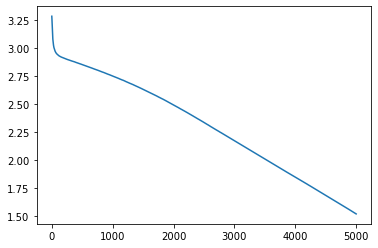

In [86]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])

In [87]:
predictions = [argmax(pred) for pred in model.predict(np.array(x_test))]

In [88]:
correct = 0
for i in range(len(predictions)):
    if predictions[i] == argmax(y_test[i]):
        correct += 1

print ("Correct:", correct)
print ("Total:", len(predictions))

Correct: 23
Total: 23


In [89]:
flag=True
print("Sustain-ed prototype-checking-enter bye to end")
while flag==True:
    print ("intent check")
    sentence = input()
    if sentence.lower()!='bye':
        prediction= model.predict(np.array([encode_sentence(sentence)]))
        print (classes[argmax(prediction)])
    else:
        print('thank you')
        flag=False

Sustain-ed prototype-checking-enter bye to end
intent check

greeting
intent check
sdg's
sdg
intent check
sdgs
sdg
intent check
sdg 1
sdg 1
intent check
bye
thank you


# Repositories

### Response repository

In [19]:
import random

In [90]:
sdg_response=['The Sustainable Development Goals (SDGs) or Global Goals are a collection of 17 interlinked global goals designed to be a "blueprint to achieve a better and more sustainable future for all"' ,
              'The SDGs were set up in 2015 by the United Nations General Assembly and are intended to be achieved by the year 2030. They are included in a UN Resolution called the 2030 Agenda or what is colloquially known as Agenda 2030.[2] The SDGs were developed in the Post-2015 Development Agenda as the future global development framework to succeed the Millennium Development Goals which ended in 2015.',
             'To facilitate monitoring, a variety of tools exist to track and visualize progress towards the goals. All intention is to make data more available and easily understood.[5] For example, the online publication SDG-Tracker, launched in June 2018, presents available data across all indicators']

In [20]:
GREETING_RESPONSES=['hello, i am your one and only freind Sustain-ed',"hi, i give out tips about SDG's",'hey Sustain-ed here nice to meet you']

In [21]:
sdg1_responses=['Goal 1: No poverty','SDG 1 is to: "End poverty in all its forms everywhere"','Achieving SDG 1 would end extreme poverty globally by 2030.',
               'The five "outcome targets" are: eradication of extreme poverty; reduction of all poverty by half; implementation of social protection systems;ensuring equal rights to ownership, basic services, technology and economic resources; and the building of resilience to environmental, economic and social disasters.',
               "Despite the ongoing progress, 10 percent of the world's population live in poverty and struggle to meet basic needs such as health, education, and access to water and sanitation.", 'Extreme poverty remains prevalent in low-income countries particularly those affected by conflict and political upheaval','Without a significant shift in social policy, extreme poverty will dramatically increase by 2030']

In [22]:
sdg2_responses=['Goal 2: Zero hunger (No hunger)','SDG 2 is to: "End hunger, achieve food security and improved nutrition, and promote sustainable agriculture".',
               'The five "outcome targets" are: ending hunger and improving access to food; ending all forms of malnutrition; agricultural productivity; sustainable food production systems and resilient agricultural practices; and genetic diversity of seeds, cultivated plants and farmed and domesticated animals; investments, research and technology.',
               'Globally, 1 in 9 people are undernourished, the vast majority of whom live in developing countries.',' Under-nutrition contributes to nearly half (45%) of deaths in children under five – 3.1 million children per year',]
            


In [23]:
sdg3_responses=['Goal 3: Good health and well-being','SDG 3 is to: "Ensure healthy lives and promote well-being for all at all ages".',
               'The first nine targets are "outcome targets". Those are: reduction of maternal mortality; ending all preventable deaths under 5 years of age; fight communicable diseases; ensure reduction of mortality from non-communicable diseases and promote mental health; prevent and treat substance abuse; reduce road injuries and deaths; grant universal access to sexual and reproductive care, family planning and education; achieve universal health coverage; and reduce illnesses and deaths from hazardous chemicals and pollution.',
               'Significant strides have been made in increasing life expectancy and reducing some of the common causes of child and maternal mortality. Between 2000 and 2016, the worldwide under-five mortality rate decreased by 47 percent (from 78 deaths per 1,000 live births to 41 deaths per 1,000 live births)']

In [24]:
sdg4_responses=['Goal 4: Quality education','SDG 4 is to: "Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all".',
               'The seven "outcome-oriented targets" are: free primary and secondary education; equal access to quality pre-primary education; affordable technical, vocational and higher education; increased number of people with relevant skills for financial success; elimination of all discrimination in education; universal literacy and numeracy; and education for sustainable development and global citizenship.',
               'major progress has been made in access to education, specifically at the primary school level, for both boys and girls. The number of out-of-school children has almost halved from 112 million in 1997 to 60 million in 2014',
               'In terms of the progress made, global participation in tertiary education reached 224 million in 2018, equivalent[disambiguation needed] to a gross enrollment ratio of 38%.']

In [25]:
sdg5_responses=['Goal 5: Gender equality','SDG 5 is to: "Achieve gender equality and empower all women and girls"',
               'Through the pledge to "Leave No One Behind", countries have committed to fast-track progress for those furthest behind, first.',
               'SDG 5 aims to grant women and girls equal rights, opportunities to live free without discrimination including workplace discrimination or any violence. This is to achieve gender equality and empower all women and girls.',
               'In 2020, representation by women in single or lower houses of national parliament reached 25 per cent, up slightly from 22 per cent in 2015.',
               'Women now have better access to decision-making positions at the local level, holding 36 per cent of elected seats in local deliberative bodies, based on data from 133 countries and areas.']

In [26]:
sdg6_responses=['Goal 6: Clean water and sanitation','SDG 6 is to: "Ensure availability and sustainable management of water and sanitation for all"',
               "The Joint Monitoring Programme (JMP) of World Health Organisation WHO And United Nations International Children's Emergency fund UNICEF reported in 2017 that 4.5 billion people currently do not have safely managed sanitation",
               'Also in 2017, only 71 per cent of the global population used safely managed drinking water, and 2.2 billion persons were still without safely managed drinking water.',
               'n 2017, Central and Southern Asia and Northern Africa registered very high water stress – defined as the ratio of fresh water withdrawn to total renewable freshwater resources – of more than 70 per cent"']

In [27]:
sdg7_responses=['Goal 7: AFFORDABLE AND CLEAN ENERGY','SDG 7 is to: "Ensure access to affordable, reliable, sustainable and modern energy for all"',
               ' targets include access to affordable and reliable energy while increasing the share of renewable energy in the global energy mix. This would involve improving energy efficiency and enhancing international cooperation to facilitate more open access to clean energy technology and more investment in clean energy infrastructure.',
               'Progress in expanding access to electricity has been made in several countries, notably India, Bangladesh, and Kenya.[39] The global population without access to electricity decreased to about 840 million in 2017 from 1.2 billion in 2010 (sub-Saharan Africa remains the region with the largest access deficit)',
               ' Renewable energy accounted for 17.5% of global total energy consumption in 2016.[39] Of the three end uses of renewables (electricity, heat, and transport) the use of renewables grew fastest with respect to electricity.',
               '. Between 2018 and 2030, the annual average investment will need to reach approximately $55 billion to expand energy access, about $700 billion to increase renewable energy and $600 billion to improve energy efficiency.']

In [28]:
sdg8_responses=['Goal 8: Decent work and economic growth','SDG 8 is to: "Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all".',
               'The targets are: sustainable economic growth; diversify, innovate and upgrade for economic productivity; promote policies to support job creation and growing enterprises; improve resource efficiency in consumption and production; full employment and decent work with equal pay; promote youth employment, education and training; end modern slavery, trafficking, and child labour; protect labour rights and promote safe working environments; promote beneficial and sustainable tourism; universal access to banking, insurance and financial services',
               'Addressing youth employment means finding solutions with and for young people who are seeking a decent and productive job.',
               "In 2019, 22 per cent of the world's young people were not in employment, education or training, a figure that has hardly changed since 2005"]

In [32]:
sdg9_responses=['Goal 9: Industry, Innovation and Infrastructure','SDG 9 is to: "Build resilient infrastructure, promote inclusive and sustainable industrialization, and foster innovation".',
               ' targets": Develop sustainable, resilient and inclusive infrastructures; promote inclusive and sustainable industrialization; increase access to financial services and markets; upgrade all industries and infrastructures for sustainability; enhance research and upgrade industrial technologies',
               "Millions of people are still unable to access the internet due to cost, coverage, and other reasons. It is estimated that just 53% of the world's population are currently internet users.",
               'The intensity of global carbon dioxide emissions has declined by nearly one quarter since 2000, showing a general decoupling of carbon dioxide emissions from GDP growth.']

In [33]:
sdg10_responses=['Goal 10: Reduced inequality','SDG 10 is to: "Reduce income inequality within and among countries".',
                 'targets: Reduce income inequalities; promote universal social, economic and political inclusion; ensure equal opportunities and end discrimination; adopt fiscal and social policies that promotes equality; improved regulation of global financial markets and institutions; enhanced representation for developing countries in financial institutions; responsible and well-managed migration policies',
                 'The main grounds of discrimination mentioned by women was not the disability itself, but religion, ethnicity and sex, pointing to the urgent need for measures to tackle multiple and intersecting forms of discrimination',
                 'In 2019, 54 per cent of countries have a comprehensive set of policy measures to facilitate orderly, safe, regular and responsible migration and mobility of people.']

In [34]:
sdg11_responses=['more data not available', "sorry sustain-ed couldn't find data"]

In [100]:
sdg12_responses=['Goal 12: Responsible consumption and production','SDG 12 is to: "Ensure sustainable consumption and production patterns"',
                "targets of the goal are: implement the 10‑Year Framework of Programs on Sustainable Consumption and Production Patterns; achieve the sustainable management and efficient use of natural resources; reducing by half the per capita global food waste at the retail and consumer levels and the reduction of food losses along production and supply chains, including post-harvest losses;[53] achieving the environmentally sound management of chemicals and all wastes throughout their life cycle; reducing waste generation through prevention, reduction, recycling and reuse; encourage companies to adopt sustainable practices; promote public procurement practices that are sustainable; and ensure that people everywhere have the relevant information and awareness for sustainable development."' targets of the goal are: implement the 10‑Year Framework of Programs on Sustainable Consumption and Production Patterns; achieve the sustainable management and efficient use of natural resources; reducing by half the per capita global food waste at the retail and consumer levels and the reduction of food losses along production and supply chains, including post-harvest losses;[53] achieving the environmentally sound management of chemicals and all wastes throughout their life cycle; reducing waste generation through prevention, reduction, recycling and reuse; encourage companies to adopt sustainable practices; promote public procurement practices that are sustainable; and ensure that people everywhere have the relevant information and awareness for sustainable development.',
                'By 2019, 79 countries and the European Union have reported on at least one national policy instrument to promote sustainable consumption and production patterns.[6]:14 This was done to work towards the implementation of the "10-Year Framework of Programmes on Sustainable Consumption and Production Patterns"',
                'To ensure that plastic products are more sustainable, thus reducing plastic waste, changes such as decreasing usage and increasing the circularity of the plastic economy are expected to be required. An increase in domestic recycling and a reduced reliance on the global plastic waste trade are other actions that might help meet the goal.']

In [101]:
sdg13_responses=['Goal 13: Climate action','SDG 13 is to: "Take urgent action to combat climate change and its impacts by regulating emissions and promoting developments in renewable energy".',
                ' targets of the goal: Strengthen resilience and adaptive capacity to climate-related disasters; integrate climate change measures into policies and planning; build knowledge and capacity to meet climate change.'
                ' By 2018, climate change continued exacerbating the frequency of natural disasters, such as massive wildfires, droughts, hurricanes and floods, affecting more than 39 million of people.[59] Over the period 2000–2018, green house emissions of developed countries and economies in transitions have declined by 6.5%.',
                ' The emissions of the developing countries are up by 43% in the period between 2000 and 2013.[60] In 2019, at least 120 of 153 developing countries had undertaken activities to formulate and implement national adaptation plans.']

In [36]:
sdg14_responses=['Goal 14: Life below water','SDG 14 is to: "Conserve and sustainably use the oceans, seas and marine resources for sustainable development".',
                'targets": Reduce marine pollution; protect and restore ecosystems; reduce ocean acidification; sustainable fishing; conserve coastal and marine areas; end subsidies contributing to overfishing; increase the economic benefits from sustainable use of marine resources.',
                'One of the key drivers of global overfishing is illegal fishing. It threatens marine ecosystems, puts food security and regional stability at risk, and is linked to major human rights violations and even organized crime. Increased ocean temperatures and oxygen loss act concurrently with ocean acidification and constitute the "deadly trio" of climate change pressures on the marine environment.']

In [37]:
sdg15_responses=['Goal 15: Life on land','SDG 15 is to: "Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss".',
                'the targets of the goals include: Conserve and restore terrestrial and freshwater ecosystems; end deforestation and restore degraded forests; end desertification and restore degraded land; ensure conservation of mountain ecosystems, protect biodiversity and natural habitats; protect access to genetic resources and fair sharing of the benefits; eliminate poaching and trafficking of protected species; prevent invasive alien species on land and in water ecosystems; and integrate ecosystem and biodiversity in governmental planning'
                "The proportion of forest area fell, from 31.9 per cent of total land area in 2000 to 31.2 per cent in 2020, representing a net loss of nearly 100 million ha of the world's forests.[6] This was due to decreasing forest area decreased in Latin America, sub-Saharan Africa and South-Eastern Asia, driven by deforestation for agriculture.",
                "Desertification affects as much as one-sixth of the world's population, 70% of all drylands, and one-quarter of the total land area of the world. It also leads to spreading poverty and the degradation of billion hectares of cropland"]

In [38]:
sdg16_responses=['Goal 16: Peace, justice and strong institutions','SDG 16 is to: "Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels".',
                'targets": Reduce violence; protect children from abuse, exploitation, trafficking and violence; promote the rule of law and ensure equal access to justice; combat organized crime and illicit financial and arms flows, substantially reduce corruption and bribery; develop effective, accountable and transparent institutions; ensure responsive, inclusive and representative decision-making; strengthen the participation in global governance; provide universal legal identity; ensure public access to information and protect fundamental freedoms.',
                'Reducing violent crime, sex trafficking, forced labor, and child abuse are clear global goals. The International Community values peace and justice and calls for stronger judicial systems that will enforce laws and work toward a more peaceful and just society.',
                ' Data from 38 countries over the past decade suggest that high-income countries have the lowest prevalence of bribery (an average of 3.7 per cent), while lower-income countries have high levels of bribery when accessing public services (22.3 per cent).']

In [39]:
sdg17_responses=['Goal 17: Partnership for the goals','SDG 17 is to: "Strengthen the means of implementation and revitalize the global partnership for sustainable development".',
                'Goal 17 is included to assure that countries and organizations cooperate instead of compete. Developing multi-stakeholder partnerships to share knowledge, expertise, technology, and financial support is seen as critical to overall success of the SDGs. The goal encompasses improving north–south and South-South cooperation, and public-private partnerships which involve civil societies are specifically mentioned',
                'With US$5 trillion to $7 trillion in annual investment required to achieve the SDGs, total official development assistance reached US$147.2 billion in 2017. This, although steady, is below the set target.[78] In 2016, six countries met the international target to keep official development assistance at or above 0.7 percent of gross national income.',
                'Humanitarian crises brought on by conflict or natural disasters have continued to demand more financial resources and aid. Even so, many countries also require official development assistance to encourage growth and trade']

# Path repository

In [91]:
path1= ".\img\Sdg1.png"
path2='.\img\sdg2.png'
path3='.\img\sdg3.png'
path4='.\img\sdg4.png'
path5='.\img\sdg5.png'
path6='.\img\sdg6.png'
path7='.\img\sdg7.png'
path8='.\img\sdg8.png'
path9='.\img\sdg9.png'
path10='.\img\sdg10.png'
path11='.\img\sdg11.png'
path12='.\img\sdg12.png'
path13='.\img\sdg13.png'
path14='.\img\sdg14.png'
path15='.\img\sdg15.png'
path16='.\img\sdg16.png'
path17='.\img\sdg17.png'
start_path='.\img\sdg.png'

In [46]:
from IPython.display import display
from PIL import Image

In [102]:

predict=(classes[argmax(prediction)])

def sustain():
    # count of the images
    img_begin=0
    img1=0
    img2=0
    img3=0
    img4=0
    img5=0
    img6=0
    img7=0
    img8=0
    img9=0
    img10=0
    img11=0
    img12=0
    img13=0
    img14=0
    img15=0
    img16=0
    img17=0

   
    loop=True
    print ("sustain-ed:Enter the sentence")
    
    
    while loop==True:
        sent = input()
        if sent.lower()!='bye':
            prediction= model.predict(np.array([encode_sentence(sent)]))
            predict=(classes[argmax(prediction)])
            
            if predict=='sdg':
                print('Sustain-ed:',random.choice(sdg_response))
                if img_begin<1:
                    display(Image.open(start_path))
                    img_begin+=1
                else: None
                
            elif predict=='greeting':
                print('Sustain-ed:',random.choice(GREETING_RESPONSES))
                
            elif predict=='sdg 1':
                print('Sustain-ed:',random.choice(sdg1_responses))
                if img1<1:
                    display(Image.open(path1))
                    img1+=1
                else: None
                
            elif predict=='sdg 2':
                print('Sustain-ed:',random.choice(sdg2_responses))
                if img2<1:
                    display(Image.open(path2))
                    img2+=1
                else: None
                
            
            elif predict=='sdg 3':
                print('Sustain-ed:',random.choice(sdg3_responses))
                if img3<1:
                    display(Image.open(path3))
                    img3+=1
                else: None
                
            
            elif predict=='sdg 4':
                print('Sustain-ed:',random.choice(sdg4_responses))
                if img4<1:
                    display(Image.open(path4))
                    img4+=1
                else: None
                
            elif predict=='sdg 5':
                print('Sustain-ed:',random.choice(sdg5_responses))
                if img5<1:
                    display(Image.open(path5))
                    img5+=1
                else: None
                
            elif predict=='sdg 6':
                print('Sustain-ed:',random.choice(sdg6_responses))
                if img6<1:
                    display(Image.open(path6))
                    img6+=1
                else: None
                
            elif predict=='sdg 7':
                print('Sustain-ed:',random.choice(sdg7_responses))
                if img7<1:
                    display(Image.open(path7))
                    img7+=1
                else: None
                
                
            elif predict=='sdg 8':
                print('Sustain-ed:',random.choice(sdg8_responses))
                if img8<1:
                    display(Image.open(path8))
                    img8+=1
                else: None
                
            
            elif predict=='sdg 9':
                print('Sustain-ed:',random.choice(sdg9_responses))
                if img9<1:
                    display(Image.open(path9))
                    img9+=1
                else: None
                 
            elif predict=='sdg 10':
                print('Sustain-ed:',random.choice(sdg10_responses))
                if img10<1:
                    display(Image.open(path10))
                    img10+=1
                else: None
                
                
            elif predict=='sdg 11':
                print('Sustain-ed:',random.choice(sdg11_responses))
                if img11<1:
                    display(Image.open(path11))
                    img11+=1
                else: None
                
                
            elif predict=='sdg 12':
                print('Sustain-ed:',random.choice(sdg12_responses))
                if img12<1:
                    display(Image.open(path12))
                    img12+=1
                else: None
                
            elif predict=='sdg 13':
                print('Sustain-ed:',random.choice(sdg13_responses))
                if img13<1:
                    display(Image.open(path13))
                    img13+=1
                else: None
                   
            elif predict=='sdg 14':
                print('Sustain-ed:',random.choice(sdg14_responses))
                if img14<1:
                    display(Image.open(path14))
                    img14+=1
                else: None
                
            elif predict=='sdg 15':
                print('Sustain-ed:',random.choice(sdg15_responses))
                if img15<1:
                    display(Image.open(path15))
                    img15+=1
                else: None
                   
            elif predict=='sdg 16':
                print('Sustain-ed:',random.choice(sdg16_responses))
                if img16<1:
                    display(Image.open(path16))
                    img16+=1
                else: None
                 
            elif predict=='sdg 17':
                print('Sustain-ed:',random.choice(sdg17_responses))
                if img17<1:
                    display(Image.open(path17))
                    img17+=1
                else: None
                    
            else:
                print("Sustain-ed:couldn't understand")
        else:
            print('Sustain-ed: well its been a honour giving you tips and info,thank you')
            loop=False

robo:Enter the sentence
sdg 1
Sustain-ed: SDG 1 is to: "End poverty in all its forms everywhere"


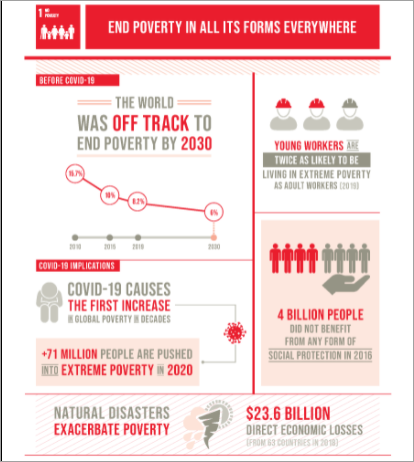

sdg 1
Sustain-ed: The five "outcome targets" are: eradication of extreme poverty; reduction of all poverty by half; implementation of social protection systems;ensuring equal rights to ownership, basic services, technology and economic resources; and the building of resilience to environmental, economic and social disasters.
bye
Sustain-ed: well its been a honour giving you tips and info,thank you


In [105]:
sustain()